In [23]:
import pandas as pd

In [33]:
def merge(L1, L2):
    global steps # add this!
    rv = []
    idx1 = 0
    idx2 = 0

    while True:
        steps += 1
        done1 = idx1 == len(L1)
        done2 = idx2 == len(L2)

        if done1 and done2:
            return rv

        choose1 = False
        if done2:
            choose1 = True
        elif not done1 and L1[idx1] < L2[idx2]:
            choose1 = True

        if choose1:
            rv.append(L1[idx1])
            idx1 += 1
        else:
            rv.append(L2[idx2])
            idx2 += 1
        #print("MERGE", rv, " <= ", L1[idx1:], L2[idx2:])
    return rv

In [30]:
merge([2, 4, 7, 8], [1, 3, 5, 6])

[1, 2, 3, 4, 5, 6, 7, 8]

In [31]:
def merge_sort(L):
    if len(L) < 2:
        return L
    mid = len(L) // 2
    left = L[:mid]
    right = L[mid:]
    left = merge_sort(left)
    right = merge_sort(right)
    rv = merge(left, right)
    #print("MERGESORT", left, right, " => ", rv)
    return rv

In [32]:
merge_sort([7, 2, 4, 8, 3, 5, 1, 6])

[1, 2, 3, 4, 5, 6, 7, 8]

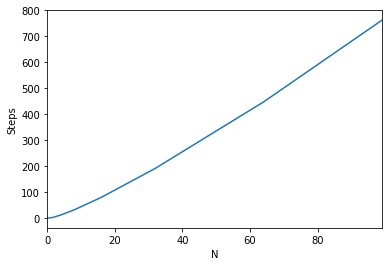

In [34]:
work_curve = pd.Series() # N => steps

L = []
for N in range(100):    
    steps = 0 # reset steps

    merge_sort(L)
    work_curve.loc[N] = steps

    L.append(N)
    
ax = work_curve.plot.line()
ax.set_xlabel("N")
ax.set_ylabel("Steps")

None